In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./Files"))

# Any results you write to the current directory are saved as output.

['bike_hour.csv', 'googleplaystore.csv', 'googleplaystore_user_reviews.csv', 'NBA_player_of_the_week.csv']


In [3]:
nba_players = pd.read_csv("./Files/NBA_player_of_the_week.csv")
pd.set_option("max_rows",10)

In [4]:
nba_players.head()

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
0,29,NaN,"Apr 14, 1985",1978,6-5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0
1,23,NaN,"Apr 7, 1985",1982,6-6,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
2,28,NaN,"Apr 1, 1985",1979,6-6,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0
3,37,NaN,"Mar 24, 1985",1969,7-2,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
4,28,NaN,"Mar 17, 1985",1978,6-9,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0


In [17]:
rookie_players  = nba_players[nba_players['Seasons in league']<1]
veteran_players = nba_players[nba_players['Seasons in league']>10]
oldest_draft    = nba_players['Draft Year'].min()
draft_6676      = nba_players[nba_players['Draft Year']<1976]
draft_7686      = nba_players[(nba_players['Draft Year']>1976) & (nba_players['Draft Year']<1986)] 
draft_8696      = nba_players[(nba_players['Draft Year']>1986) & (nba_players['Draft Year']<1996)] 
draft_9606      = nba_players[(nba_players['Draft Year']>1996) & (nba_players['Draft Year']<2006)] 
draft_0616      = nba_players[(nba_players['Draft Year']>2006) & (nba_players['Draft Year']<2016)] 

In [28]:
nba_players[nba_players["Player"].str.contains("mes")]

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
543,20,East,"Jan 23, 2005",2003,6-8,LeBron James,F,2004-2005,2005,1,Cleveland Cavaliers,250,0.5
559,20,East,"Nov 28, 2004",2003,6-8,LeBron James,F,2004-2005,2005,1,Cleveland Cavaliers,250,0.5
563,20,East,"Nov 14, 2004",2003,6-8,LeBron James,F,2004-2005,2005,1,Cleveland Cavaliers,250,0.5
571,21,East,"Apr 2, 2006",2003,6-8,LeBron James,F,2005-2006,2006,2,Cleveland Cavaliers,250,0.5
573,21,East,"Mar 26, 2006",2003,6-8,LeBron James,F,2005-2006,2006,2,Cleveland Cavaliers,250,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,33,East,"Dec 18, 2017",2003,203cm,LeBron James,F,2017-2018,2018,14,Cleveland Cavaliers,113kg,0.5
1131,33,East,"Dec 4, 2017",2003,203cm,LeBron James,F,2017-2018,2018,14,Cleveland Cavaliers,113kg,0.5
1132,28,West,"Dec 4, 2017",2009,196cm,James Harden,SG,2017-2018,2018,8,Houston Rockets,100kg,0.5
1140,28,West,"Nov 6, 2017",2009,196cm,James Harden,SG,2017-2018,2018,8,Houston Rockets,100kg,0.5


In [34]:
nba_players['Player'].value_counts()

LeBron James      61
Kobe Bryant       33
Kevin Durant      26
Michael Jordan    25
Allen Iverson     23
                  ..
Oliver Miller      1
Allan Houston      1
Al Harrington      1
Sleepy Floyd       1
Roy Tarpley        1
Name: Player, Length: 274, dtype: int64

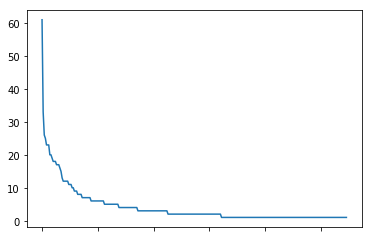

In [37]:
legends = nba_players['Player'].value_counts()
legends.plot()

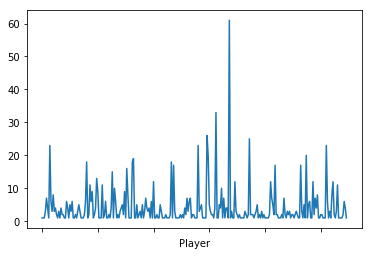

In [43]:
nba_players.groupby('Player').size().plot()

In [47]:
rookie_players

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
11,22,NaN,"Jan 20, 1985",1984,6-6,Michael Jordan,SG,1984-1985,1985,0,Chicago Bulls,215,1.0
43,23,NaN,"Nov 17, 1985",1985,7-0,Patrick Ewing,C,1985-1986,1986,0,New York Knicks,240,1.0
65,24,NaN,"Nov 30, 1986",1985,6-11,Hot Rod Williams,FC,1986-1987,1987,0,Cleveland Cavaliers,215,1.0
115,24,NaN,"Apr 22, 1990",1987,7-1,David Robinson,C,1989-1990,1990,0,San Antonio Spurs,250,1.0
119,24,NaN,"Mar 25, 1990",1987,7-1,David Robinson,C,1989-1990,1990,0,San Antonio Spurs,250,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,22,East,"Feb 22, 2004",2003,6-4,Dwyane Wade,SG,2003-2004,2004,0,Miami Heat,220,0.5
586,20,West,"Feb 6, 2006",2005,6-0,Chris Paul,PG,2005-2006,2006,0,New Orleans Hornets,175,0.5
791,20,East,"Nov 16, 2009",2009,6-1,Brandon Jennings,G,2009-2010,2010,0,Milwaukee Bucks,170,0.5
965,22,East,"Nov 4, 2013",2013,6-6,Michael Carter-Williams,PG,2013-2014,2014,0,Philadelphia Sixers,190,0.5


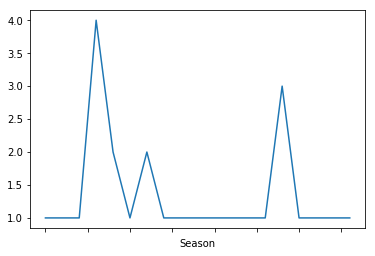

In [49]:
rookie_players.groupby('Season').size().plot()

In [62]:
pd.set_option("max_rows",67)
rookie_players.groupby(["Season","Position","Player"]).size()

Season     Position  Player                 
1984-1985  SG        Michael Jordan             1
1985-1986  C         Patrick Ewing              1
1986-1987  FC        Hot Rod Williams           1
1989-1990  C         David Robinson             3
           PG        Tim Hardaway               1
1990-1991  SF        Dennis Scott               1
                     Lionel Simmons             1
1991-1992  F         Larry Johnson              1
1992-1993  C         Alonzo Mourning            1
                     Shaquille O'Neal           1
1993-1994  F-C       Chris Webber               1
1994-1995  PG        Jason Kidd                 1
1995-1996  C         Arvydas Sabonis            1
1996-1997  G         Allen Iverson              1
1997-1998  FC        Tim Duncan                 1
1998-1999  SF        Vince Carter               1
1999-2000  G         Steve Francis              1
2003-2004  F         Carmelo Anthony            2
           SG        Dwyane Wade                1
2005-

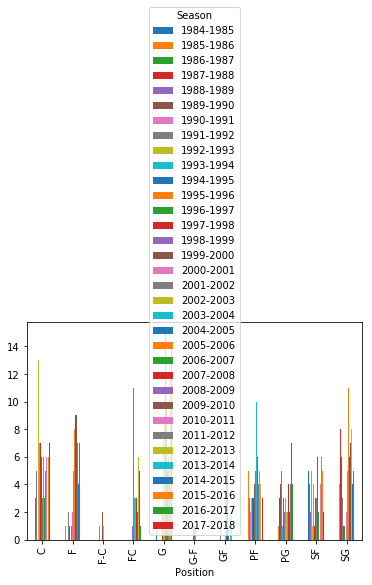

In [77]:
pd.set_option("max_rows",23)
vet_sep = nba_players.groupby(['Position','Season']).size()
vet_sep.unstack().plot(kind="bar")

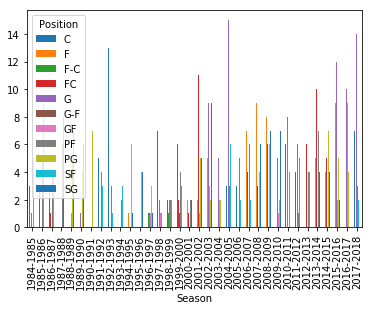

In [83]:
vet_sep = nba_players.groupby(['Position','Season']).size()
vet_sep.unstack(0).plot(kind="bar")